In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('Leads.csv')
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
## Number of rows and columns in the dataset
df.shape

(9240, 37)

In [4]:
## Inspecting Datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Dealing with "Select" in categorical features, so to get true picture of the data and creating a copied dataframe so as to keep the original data intact

In [5]:
df1 = df.copy()
df1 = df1.replace("Select",np.nan)

In [6]:
## Percentage of missing values in each column
missing_vals = [feature for feature in df.columns if round(100*(df1[feature].isnull().mean()),2)>0]
for feature in missing_vals:
    print("{0}, has {1}% missing values".format(feature,round(100*(df1[feature].isnull().mean()),2)))

Lead Source, has 0.39% missing values
TotalVisits, has 1.48% missing values
Page Views Per Visit, has 1.48% missing values
Last Activity, has 1.11% missing values
Country, has 26.63% missing values
Specialization, has 36.58% missing values
How did you hear about X Education, has 78.46% missing values
What is your current occupation, has 29.11% missing values
What matters most to you in choosing a course, has 29.32% missing values
Tags, has 36.29% missing values
Lead Quality, has 51.59% missing values
Lead Profile, has 74.19% missing values
City, has 39.71% missing values
Asymmetrique Activity Index, has 45.65% missing values
Asymmetrique Profile Index, has 45.65% missing values
Asymmetrique Activity Score, has 45.65% missing values
Asymmetrique Profile Score, has 45.65% missing values


#### Early data check shows many features with yes/no binary options and no missing values in them, grouping them together

In [7]:
yn_vars = [feature for feature in df.columns if df1[feature].dtypes == "O" and (len(df1[feature].unique())<=2)]

In [8]:
yn_vars

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

#### Visualizing skewness in these features

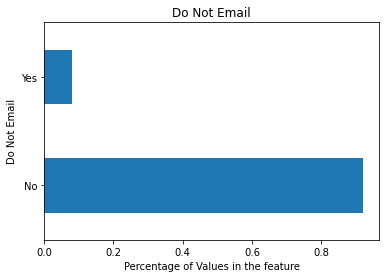

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


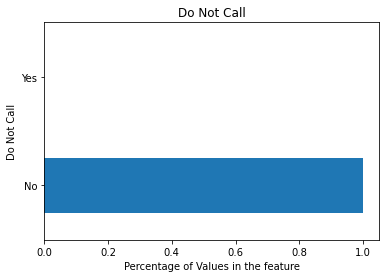

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


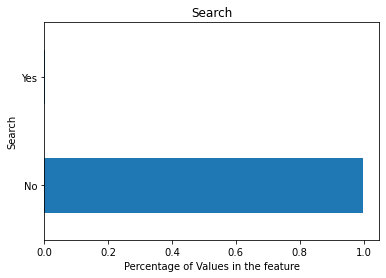

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


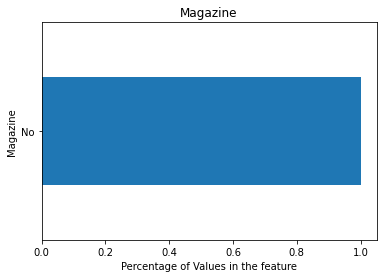

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


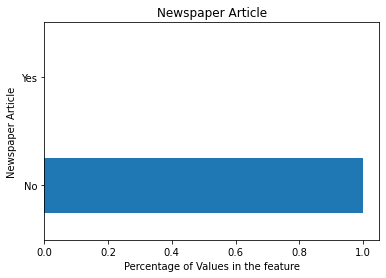

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


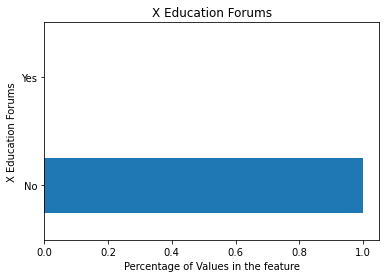

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


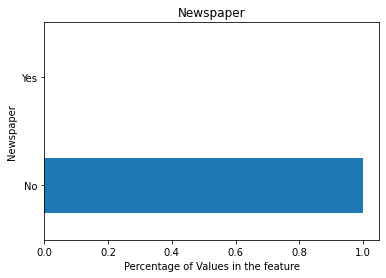

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


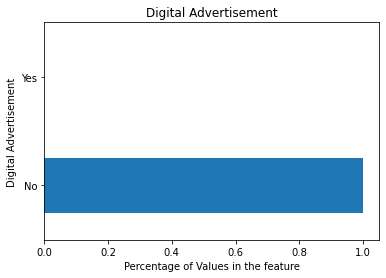

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


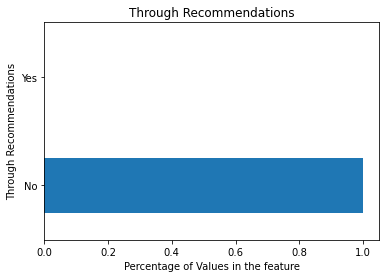

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


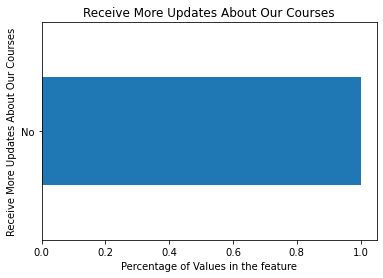

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


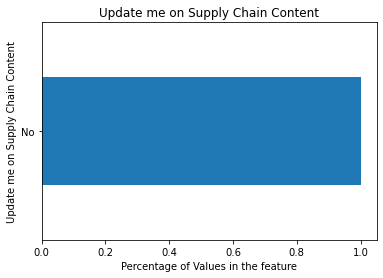

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


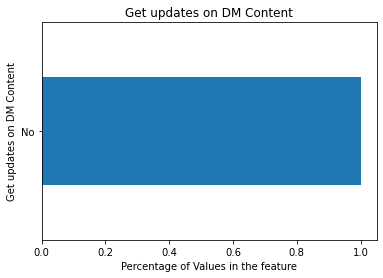

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


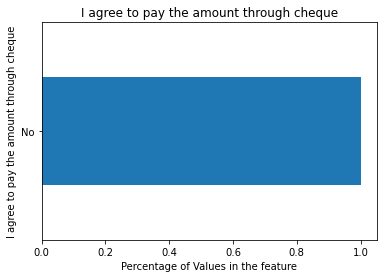

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


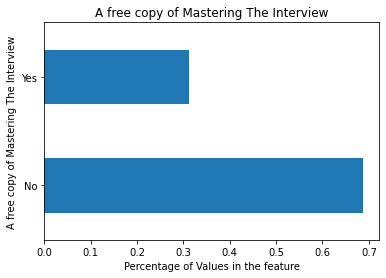

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [9]:
## Visualizing the number and name of unique values in these features
for feature in yn_vars:
    df1[feature].value_counts(normalize=True).plot.barh()
    plt.title(feature)
    plt.ylabel(feature)
    plt.xlabel("Percentage of Values in the feature")
    plt.show()
    print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")

In [10]:
## skewed yes no variables, used an algorithm to classify skew as 1 feature having more than 85% observations
skewed_yn_vars = [feature for feature in yn_vars if df1[feature].value_counts(normalize=True)[0]>0.85]
skewed_yn_vars

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [11]:
## Categorical features
cat_feat = [feature for feature in df1.columns if df1[feature].dtypes=="O" and feature != 'Prospect ID' and feature not in yn_vars]
cat_feat

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Last Notable Activity']

#### Visualizing skewness(Weightage of Unique values) in these features

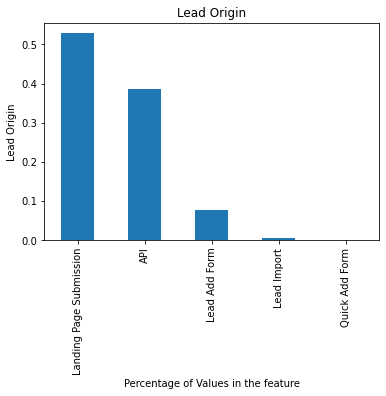

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


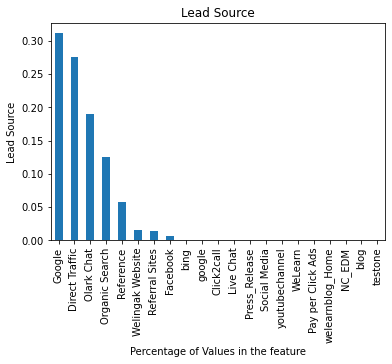

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


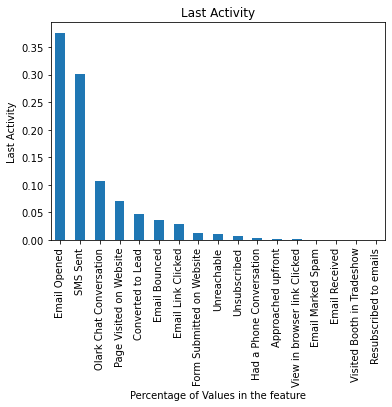

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


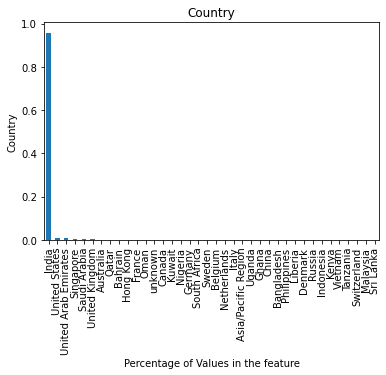

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


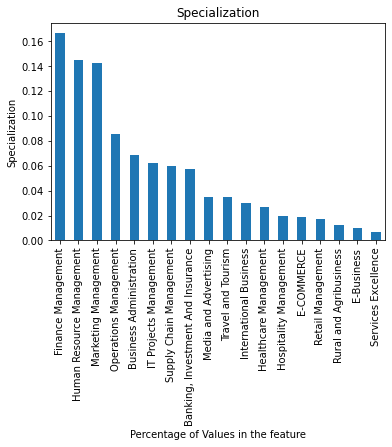

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


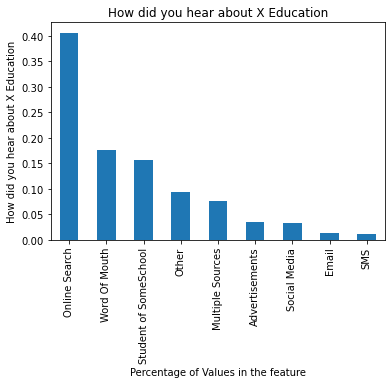

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


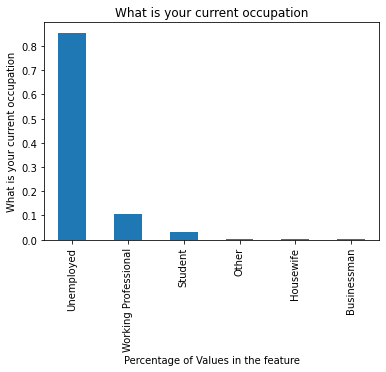

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


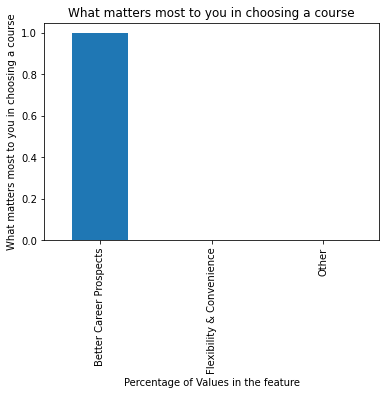

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


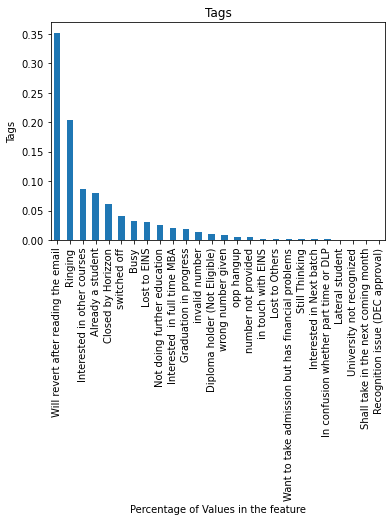

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


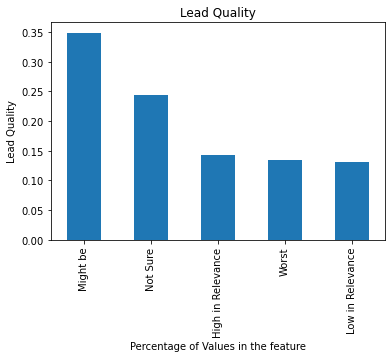

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


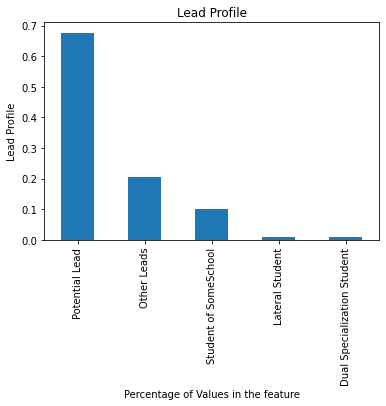

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


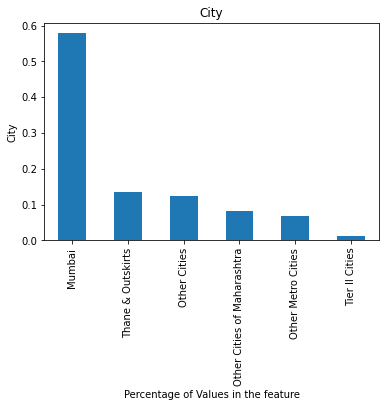

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


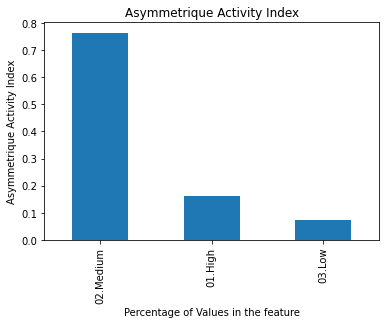

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


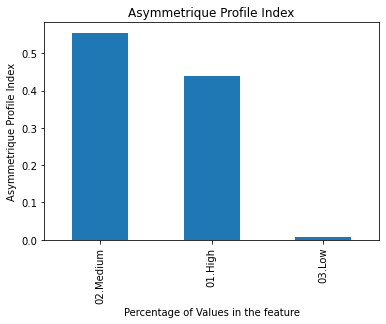

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


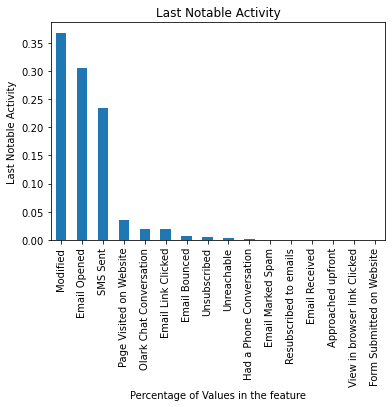

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [12]:
## Visualizing the number and name of unique values in these features
for feature in cat_feat:
    df1[feature].value_counts(normalize=True).plot.bar()
    plt.title(feature)
    plt.ylabel(feature)
    plt.xlabel("Percentage of Values in the feature")
    plt.show()
    print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")

In [13]:
## Came up with a personalized algorithm of removing features with skewness above 70% and less than equal to 4 unique feature
skewed_cat_features = [feature for feature in cat_feat if df1[feature].value_counts(normalize=True)[0]>0.7 and len(df1[feature].unique())<=4]
skewed_cat_features

['What matters most to you in choosing a course',
 'Asymmetrique Activity Index']

In [14]:
## Removing Skewed Categorical Features 
skewed_feat = skewed_cat_features+skewed_yn_vars
df1.drop(skewed_feat,axis=1,inplace=True)

In [15]:
## Percentage of total features removed because of their skewness
print("The Percentage of Total features has been reduced by",round(100*(len(skewed_feat)/37),2))

The Percentage of Total features has been reduced by 40.54


In [16]:
## Updating lists (yn_vars,cat_features)
yn_vars = [feature for feature in df1.columns if df1[feature].dtypes == "O" and (len(df1[feature].unique())<=2)]
cat_feat = [feature for feature in df1.columns if df1[feature].dtypes=="O" and feature != 'Prospect ID' and feature not in yn_vars]

In [17]:
## Mapping yn_vars to 0 and 1
for feature in yn_vars:
    df1[feature] = df1[feature].map({'No':0,'Yes':1})

In [18]:
## Missing Percentage in categorical Features
missing_cat_feat = [feature for feature in df1.columns if feature in cat_feat and feature in missing_vals]
for feature in missing_cat_feat:
    print("The categorical feature, '{0}', has {1} % missing values".format(feature,round(100*(df1[feature].isnull().mean()),2)))

The categorical feature, 'Lead Source', has 0.39 % missing values
The categorical feature, 'Last Activity', has 1.11 % missing values
The categorical feature, 'Country', has 26.63 % missing values
The categorical feature, 'Specialization', has 36.58 % missing values
The categorical feature, 'How did you hear about X Education', has 78.46 % missing values
The categorical feature, 'What is your current occupation', has 29.11 % missing values
The categorical feature, 'Tags', has 36.29 % missing values
The categorical feature, 'Lead Quality', has 51.59 % missing values
The categorical feature, 'Lead Profile', has 74.19 % missing values
The categorical feature, 'City', has 39.71 % missing values
The categorical feature, 'Asymmetrique Profile Index', has 45.65 % missing values


In [19]:
## For categorical features, creating a missing category for null values, in the new dataframe df1
for feature in missing_cat_feat:
    df1[feature] = df1[feature].fillna("Missing")

#### In Categorical Features, implementing a "rare_val" for any unique value that has less than 5% of observations. This will reduce the number of columns when creating dummies

In [20]:
for feature in cat_feat:
    temp = df1.groupby(feature)["Converted"].count()/len(df1)
    temp_df = temp[temp>0.05].index
    df1[feature] = np.where(df1[feature].isin(temp_df),df1[feature],"rare_val")

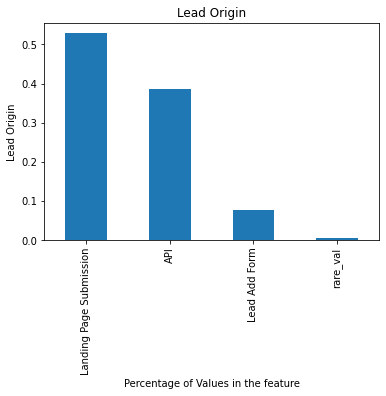

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


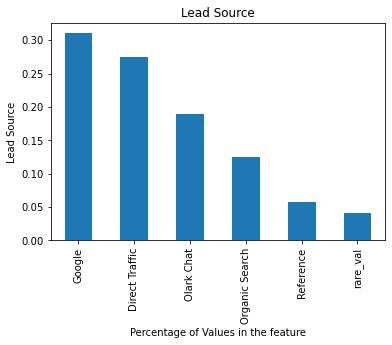

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


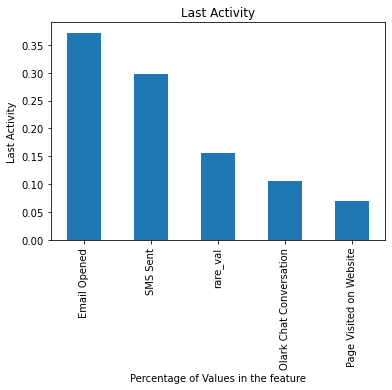

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


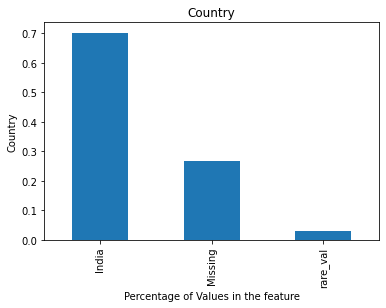

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


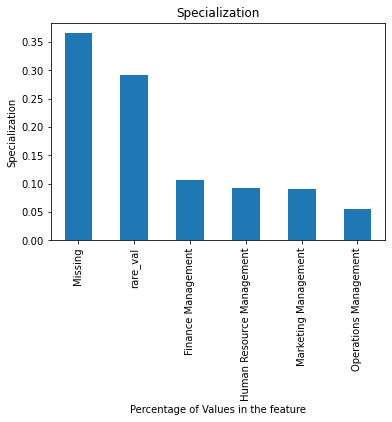

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


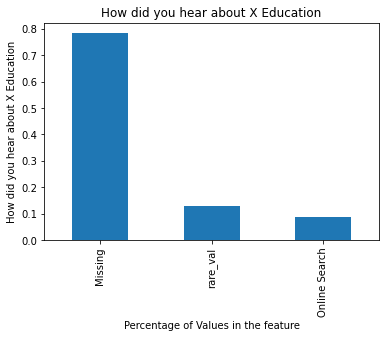

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


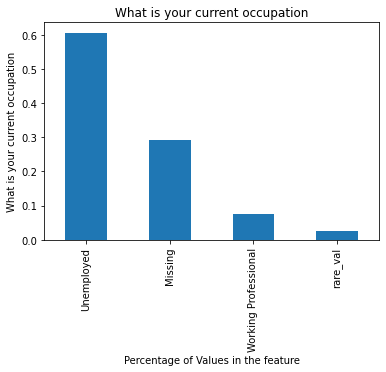

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


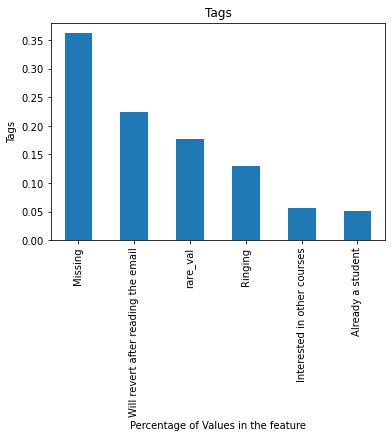

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


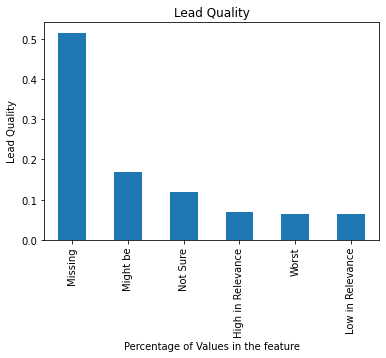

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


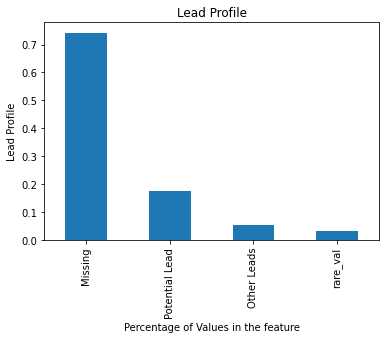

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


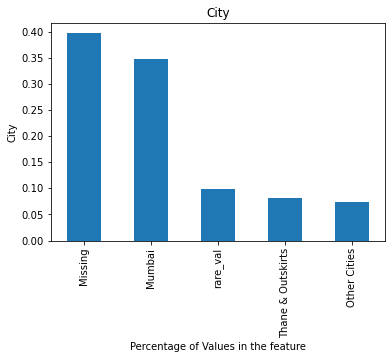

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


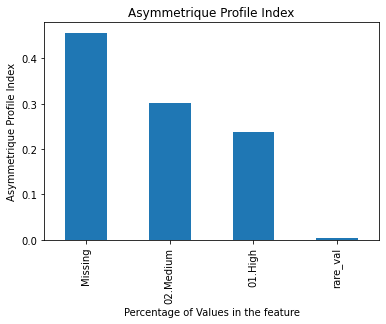

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


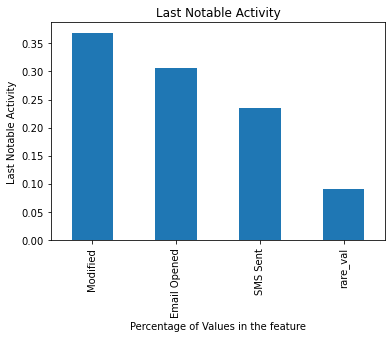

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [21]:
## Visualizing the Categorical Features after all the modifications
for feature in cat_feat:
    df1[feature].value_counts(normalize=True).plot.bar()
    plt.title(feature)
    plt.ylabel(feature)
    plt.xlabel("Percentage of Values in the feature")
    plt.show()
    print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")

In [22]:
## Numerical Features
num_feat = [feature for feature in df1.columns if df1[feature].dtypes != "O" and feature != "Lead Number" and feature != "Converted" and feature not in yn_vars]
num_feat

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

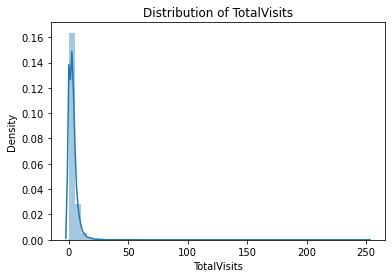

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


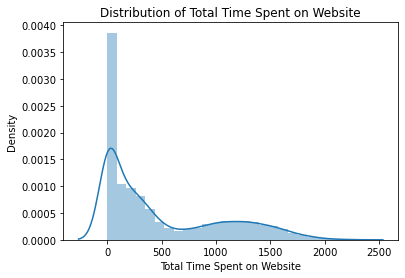

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


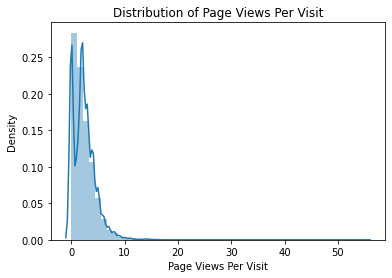

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


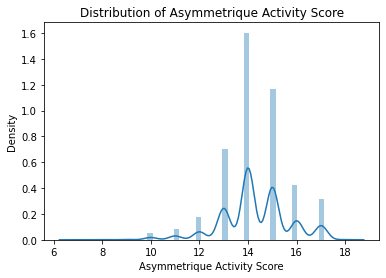

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


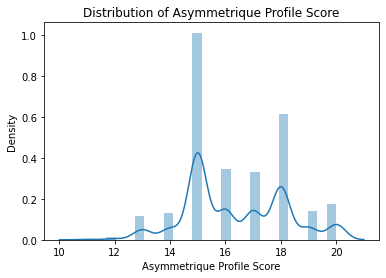

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ


In [23]:
## Checking distribution of Numerical Variables
for feature in num_feat:
    sns.distplot(df1[feature])
    plt.title("Distribution of {}".format(feature))
    plt.show()
    print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")

#### Above distributions shows that the numerical variables, 'Asymmetrique Activity Score', 'Asymmetrique Profile Score' are almost acting as discrete variables, while others are not normally distributed.

In [24]:
## Finding out which features are missing
missing_num_feat = [feature for feature in df1.columns if feature in num_feat and feature in missing_vals]
for feature in missing_num_feat:
    print("The Numerical Feature, {0} has {1} % missing values".format(feature,round(100*(df[feature].isnull().mean()),2)))

The Numerical Feature, TotalVisits has 1.48 % missing values
The Numerical Feature, Page Views Per Visit has 1.48 % missing values
The Numerical Feature, Asymmetrique Activity Score has 45.65 % missing values
The Numerical Feature, Asymmetrique Profile Score has 45.65 % missing values


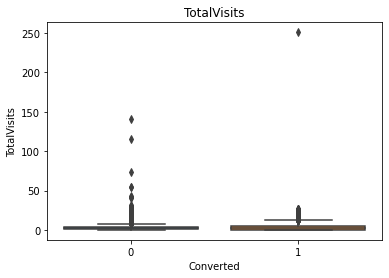

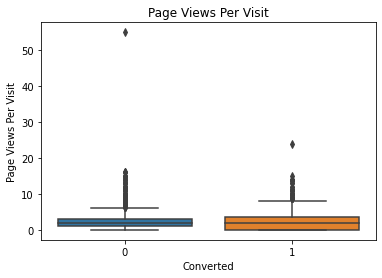

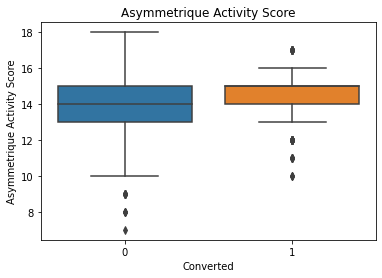

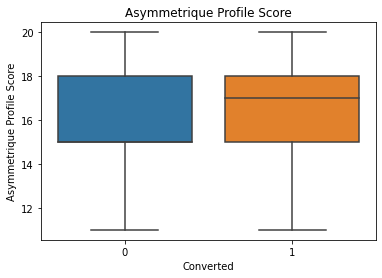

In [25]:
## Visualizing to witness the outlier presence in above features
for feature in missing_num_feat:
    sns.boxplot(data=df1, x="Converted", y=feature)
    plt.title(feature)
    plt.show()

#### The above visualisation confirms that among most of the numerical features, there exists a whole lot of outliers.. While the discrete numeric features are distributed in a manner wherein the box occupies less space, but the whiskers are elongated, meaning these variables (Assymetrique ones) aren't well distributed as well

In [26]:
## Imputing the numerical variables with median
for feature in missing_num_feat:
    med_val = df1[feature].median()
    df1[feature] = df1[feature].fillna(med_val)

In [27]:
## Checking, if there's still any missing values
df1.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
How did you hear about X Education        0
What is your current occupation           0
Tags                                      0
Lead Quality                              0
Lead Profile                              0
City                                      0
Asymmetrique Profile Index                0
Asymmetrique Activity Score               0
Asymmetrique Profile Score                0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### Looks like missing values have been dealt with

## Before, moving forward.. Inspecting the crucial thing, i.e., "Class Imbalance"

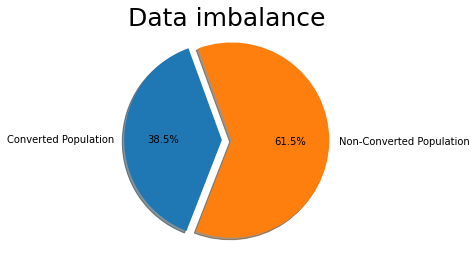

In [28]:
## Class Imbalance in the Original Data
count1 = 0 
count0 = 0
for i in df['Converted'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df['Converted']))*100
count0 = (count0/len(df['Converted']))*100

x = ['Converted Population','Non-Converted Population']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

#### Above Pie-Chart shows that our population is divided in almost 3:2 ratio of non-conversion V/s conversion, which is not ideal but decent enough to work with

In [29]:
## Getting rid of ID columns from df1
df1.drop(["Prospect ID","Lead Number"],1,inplace=True)

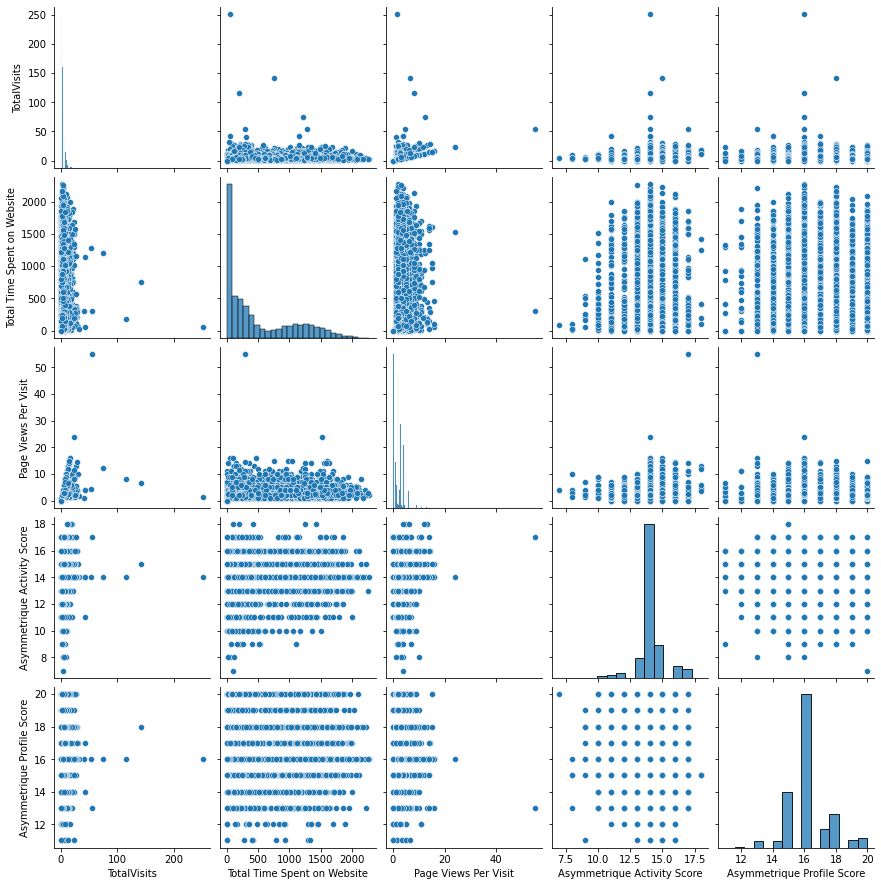

In [30]:
## For some Numerical Bivariate analysis, visualizing scatter plots
sns.pairplot(data=df1, x_vars=num_feat, y_vars=num_feat)
plt.show()

### Above scatter plots make the relationships between numerical features and discrete numerical features abundantly clear

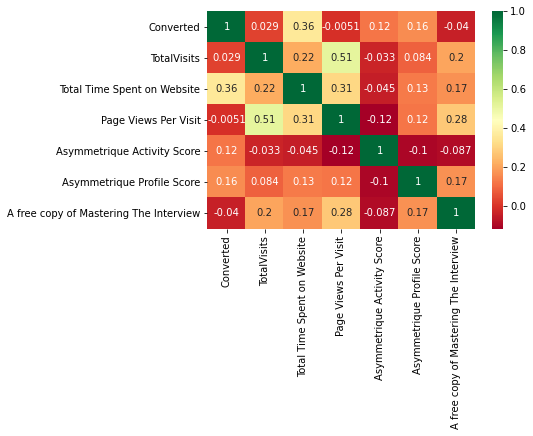

In [31]:
## Correlation Heat Map
sns.heatmap(df1.corr(),annot=True,cmap="RdYlGn")
plt.show()

### Above Correlation Matrix reveals that the target variable isn't strongly correlated with any of the numerical variables, hence much of our model's strength must come from categorical features

In [32]:
df1.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Quality,Lead Profile,City,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Missing,Missing,Missing,Unemployed,Interested in other courses,Low in Relevance,Missing,Missing,02.Medium,15.0,15.0,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Missing,Missing,Unemployed,Ringing,Missing,Missing,Missing,02.Medium,15.0,15.0,0,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,rare_val,Missing,rare_val,Will revert after reading the email,Might be,Potential Lead,Mumbai,01.High,14.0,20.0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,rare_val,India,rare_val,rare_val,Unemployed,Ringing,Not Sure,Missing,Mumbai,01.High,13.0,17.0,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,rare_val,India,Missing,rare_val,Unemployed,Will revert after reading the email,Might be,Missing,Mumbai,01.High,15.0,18.0,0,Modified


In [33]:
## Creating Dummies for cat_feat
dum_cat = pd.get_dummies(df1[cat_feat],drop_first=True)
dum_cat.shape

(9240, 47)

In [34]:
## Removing original features from dataset
df1 = df1.drop(cat_feat,1)

In [35]:
## Merging 2 Dataframes
df1 = pd.concat([df1,dum_cat],axis=1)
df1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_rare_val,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_rare_val,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_rare_val,Country_Missing,Country_rare_val,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Missing,Specialization_Operations Management,Specialization_rare_val,How did you hear about X Education_Online Search,How did you hear about X Education_rare_val,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_rare_val,Tags_Interested in other courses,Tags_Missing,Tags_Ringing,Tags_Will revert after reading the email,Tags_rare_val,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Missing,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_rare_val,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_rare_val,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_Missing,Asymmetrique Profile Index_rare_val,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_rare_val
0,0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,5.0,674,2.5,15.0,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,14.0,20.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,13.0,17.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,15.0,18.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


#### Doing train test split

In [36]:
train,test = train_test_split(df1, test_size=0.3, random_state=100)

In [37]:
train.shape

(6468, 54)

In [38]:
test.shape

(2772, 54)

In [39]:
## Standardizing training dataset
scaler = StandardScaler()
train[num_feat] = scaler.fit_transform(train[num_feat])

In [40]:
## X-y Split
X_train = train.drop('Converted',1)
y_train = train['Converted']

In [41]:
## Feature Selection
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

rfe = RFE(logreg,25)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=25)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 25),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_rare_val', True, 1),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', False, 27),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_rare_val', False, 19),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_rare_val', True, 1),
 ('Country_Missing', True, 1),
 ('Country_rare_val', False, 20),
 ('Specialization_Human Resource Management', False, 11),
 ('Specialization_Marketing Management', False, 10),
 ('Specialization_Missing', False, 15),
 ('Specialization_Operati

In [43]:
## 25 columns that were approved
X_train2 = X_train[X_train.columns[rfe.support_]]

In [44]:
## Making another model using statsmodels
Xsm2 = sm.add_constant(X_train2)
logreg2 = sm.GLM(y_train,Xsm2, family=sm.families.Binomial()).fit()
print(logreg2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1474.3
Date:                Wed, 17 Feb 2021   Deviance:                       2948.6
Time:                        21:22:45   Pearson chi2:                 9.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [45]:
## Removing "Lead Origin_rare_val" from X_train2 because of ginormous p-value
X_train3 = X_train2.drop("Lead Origin_rare_val",1)

## Adding constant
Xsm3 = sm.add_constant(X_train3)

## Training another model
logreg3 = sm.GLM(y_train,Xsm3,family=sm.families.Binomial()).fit()
print(logreg3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1475.3
Date:                Wed, 17 Feb 2021   Deviance:                       2950.5
Time:                        21:22:46   Pearson chi2:                 9.85e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [46]:
## Removing "Tags_Ringing" due to p-value, from X_train3
X_train4 = X_train3.drop(["Tags_Ringing"],1)

## Adding constant
Xsm4 = sm.add_constant(X_train4)

## Training another model
logreg4 = sm.GLM(y_train,Xsm4,family=sm.families.Binomial()).fit()
print(logreg4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1476.3
Date:                Wed, 17 Feb 2021   Deviance:                       2952.7
Time:                        21:22:46   Pearson chi2:                 9.78e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [47]:
X_train4.columns

Index(['Total Time Spent on Website', 'Asymmetrique Activity Score',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_rare_val', 'Country_Missing',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_rare_val', 'Tags_Missing',
       'Tags_Will revert after reading the email', 'Tags_rare_val',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Missing', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Potential Lead', 'Lead Profile_rare_val',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_rare_val'],
      dtype='object')

In [48]:
## Adding 'Lead Origin_Landing Page Submission', the next best feature, to X_train4 to see if it makes any difference
X_train5 = X_train[['Total Time Spent on Website', 'Asymmetrique Activity Score',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_rare_val', 'Country_Missing',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_rare_val', 'Tags_Missing',
       'Tags_Will revert after reading the email', 'Tags_rare_val',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Missing', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Potential Lead', 'Lead Profile_rare_val',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_rare_val','Lead Origin_Landing Page Submission']]

## Adding constant
Xsm5 = sm.add_constant(X_train5)

## Training another model
logreg5 = sm.GLM(y_train,Xsm5,family=sm.families.Binomial()).fit()
print(logreg5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1470.9
Date:                Wed, 17 Feb 2021   Deviance:                       2941.9
Time:                        21:22:46   Pearson chi2:                 1.02e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### P-values are respectable enough, adding next best feature

In [49]:
## Adding next best feature to X_train5
X_train6 = X_train[['Total Time Spent on Website', 'Asymmetrique Activity Score',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_rare_val', 'Country_Missing',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_rare_val', 'Tags_Missing',
       'Tags_Will revert after reading the email', 'Tags_rare_val',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Missing', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Potential Lead', 'Lead Profile_rare_val',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_rare_val','Lead Origin_Landing Page Submission',
        'How did you hear about X Education_rare_val']]

## Adding constant
Xsm6 = sm.add_constant(X_train6)

## Training another model
logreg6 = sm.GLM(y_train,Xsm6,family=sm.families.Binomial()).fit()
print(logreg6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1467.4
Date:                Wed, 17 Feb 2021   Deviance:                       2934.7
Time:                        21:22:46   Pearson chi2:                 1.05e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [50]:
## Repeating by adding the next best feature
X_train7 = X_train[['Total Time Spent on Website', 'Asymmetrique Activity Score',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_rare_val', 'Country_Missing',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_rare_val', 'Tags_Missing',
       'Tags_Will revert after reading the email', 'Tags_rare_val',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Missing', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Potential Lead', 'Lead Profile_rare_val',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_rare_val','Lead Origin_Landing Page Submission',
        'How did you hear about X Education_rare_val','How did you hear about X Education_Online Search']]

## Adding constant
Xsm7 = sm.add_constant(X_train7)

## Training another model
logreg7 = sm.GLM(y_train,Xsm7,family=sm.families.Binomial()).fit()
print(logreg7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1466.1
Date:                Wed, 17 Feb 2021   Deviance:                       2932.2
Time:                        21:22:46   Pearson chi2:                 1.07e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### The next best feature has a huge p-value, hence using logreg6 model and checking multicollinearity

In [51]:
print(logreg6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1467.4
Date:                Wed, 17 Feb 2021   Deviance:                       2934.7
Time:                        21:22:47   Pearson chi2:                 1.05e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [52]:
## Checking multi-collinearity in the model
vif = pd.DataFrame()
vif["Features"] = X_train6.columns
vif["VIF"] = [variance_inflation_factor(X_train6.values,i) for i in range(X_train6.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif.sort_values("VIF", ascending=False)

,Features,VIF
16,Lead Quality_Missing,8.50
8,What is your current occupation_Unemployed,6.51
5,Last Activity_SMS Sent,5.76
11,Tags_Missing,5.33
21,Last Notable Activity_SMS Sent,5.04
23,Lead Origin_Landing Page Submission,3.48
12,Tags_Will revert after reading the email,3.36
7,Country_Missing,3.15
15,Lead Quality_Might be,3.14
17,Lead Quality_Not Sure,2.47


## logreg6 is the chosen model, and the multicollinearity levels (i.e., Variance Inflation Factor) are lower than 10% that means acceptable, but not perfect... Not removing the highest correlated values as it's p-value depicts that the feature is significant

In [53]:
## Predicting on the test data
y_predtrain = logreg6.predict(Xsm6)

In [54]:
## Prediction Dataframe
df_pred = pd.DataFrame()
df_pred["ID"] = y_train.index
df_pred["Converted"] = y_train.values
df_pred["Lead_prob"] = y_predtrain.values.reshape(-1,1)
df_pred.head(10)

,ID,Converted,Lead_prob
0,1871,0,0.009746
1,6795,0,0.355850
2,3516,0,0.012467
3,8105,0,0.172582
4,3934,0,0.369922
5,4844,1,0.998321
6,3297,0,0.002422
7,8071,1,0.978205
8,987,0,0.206650
9,7423,1,0.998019


In [55]:
## Preparing df_pred for metrics
num = [x/10 for x in range(1,10)]
for i in num:
    df_pred[i] = df_pred['Lead_prob'].map(lambda x:1 if x>i else 0)
df_pred.head()

,ID,Converted,Lead_prob,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1871,0,0.009746,0,0,0,0,0,0,0,0,0
1,6795,0,0.355850,1,1,1,0,0,0,0,0,0
2,3516,0,0.012467,0,0,0,0,0,0,0,0,0
3,8105,0,0.172582,1,0,0,0,0,0,0,0,0
4,3934,0,0.369922,1,1,1,0,0,0,0,0,0


In [56]:
### Metric Dataframe
df_metric = pd.DataFrame(columns=['Lead_prob','Accuracy','Senstivity','Specifity','Precision_Conv','Precision_NoConv',"Recall_Conv","Recall_NoConv"])
for i in num:
    cm = metrics.confusion_matrix(df_pred['Converted'],df_pred[i])
    tot = sum(sum(cm))
    a = (cm[0,0]+cm[1,1])/tot
    sen = cm[1,1]/(cm[1,1]+cm[1,0])
    spec = cm[0,0]/(cm[0,0]+cm[0,1])
    prec1 = cm[1,1]/(cm[1,1]+cm[0,1])
    prec2 = cm[0,0]/(cm[0,0]+cm[1,0])
    rec1 = cm[1,1]/(cm[1,1]+cm[1,0])
    rec2 = cm[0,0]/(cm[0,0]+cm[0,1])
    df_metric.loc[i] = [i,a,sen,spec,prec1,prec2,rec1,rec2]

In [57]:
df_metric

,Lead_prob,Accuracy,Senstivity,Specifity,Precision_Conv,Precision_NoConv,Recall_Conv,Recall_NoConv
0.1,0.1,0.825912,0.967964,0.738381,0.695108,0.973962,0.967964,0.738381
0.2,0.2,0.874923,0.938767,0.835582,0.778675,0.956795,0.938767,0.835582
0.3,0.3,0.899660,0.915653,0.889805,0.836606,0.944813,0.915653,0.889805
0.4,0.4,0.913265,0.884023,0.931284,0.887984,0.928732,0.884023,0.931284
0.5,0.5,0.916048,0.859286,0.951024,0.915335,0.916446,0.859286,0.951024
0.6,0.6,0.909555,0.823195,0.962769,0.931620,0.898345,0.823195,0.962769
0.7,0.7,0.901979,0.785888,0.973513,0.948141,0.880651,0.785888,0.973513
0.8,0.8,0.886827,0.730738,0.983008,0.963636,0.855589,0.730738,0.983008
0.9,0.9,0.862709,0.653690,0.991504,0.979344,0.822895,0.653690,0.991504


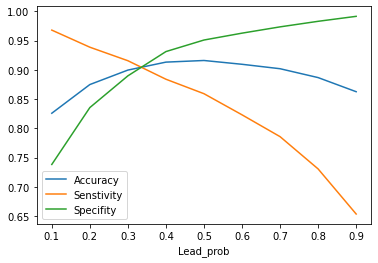

In [58]:
df_metric.plot.line(x='Lead_prob', y=['Accuracy','Senstivity','Specifity'])
plt.show()

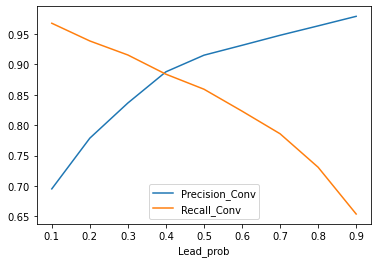

In [59]:
df_metric.plot.line(x='Lead_prob', y=['Precision_Conv','Recall_Conv'])
plt.show()

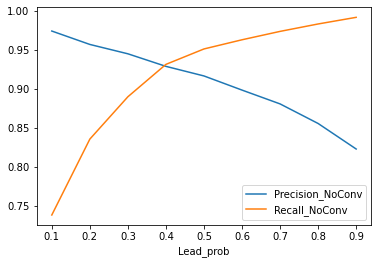

In [60]:
df_metric.plot.line(x='Lead_prob', y=['Precision_NoConv','Recall_NoConv'])
plt.show()

### These line charts suggest our optimal Threshold probability
### But, our model has to be of a kind which predicts the converted calls with the most accuracy, even though in the process it ends up predicting some 0s as 1s

In [61]:
### ROC Curve
def drawroc(actual,prob):
    fpr,tpr,thresholds = metrics.roc_curve(actual,prob,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,prob)
    plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [62]:
fpr,tpr,thresholds = metrics.roc_curve(df_pred['Converted'],df_pred['Lead_prob'],drop_intermediate=False)

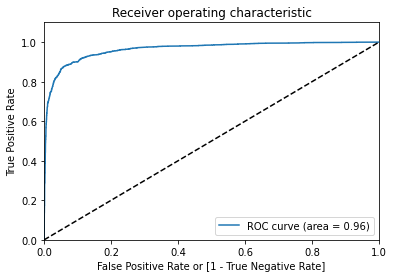

In [63]:
drawroc(df_pred['Converted'],df_pred['Lead_prob'])

#### Receiver Operating Characteristic Curve, is respectable as well.. The Area Under the Curve is 96%, which is great

In [64]:
## F1 score for some values of i
for i in num[2:6]:
    print(i,metrics.classification_report(df_pred["Converted"],df_pred[i]))
    print("ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ")

0.3               precision    recall  f1-score   support

           0       0.94      0.89      0.92      4002
           1       0.84      0.92      0.87      2466

    accuracy                           0.90      6468
   macro avg       0.89      0.90      0.90      6468
weighted avg       0.90      0.90      0.90      6468

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ
0.4               precision    recall  f1-score   support

           0       0.93      0.93      0.93      4002
           1       0.89      0.88      0.89      2466

    accuracy                           0.91      6468
   macro avg       0.91      0.91      0.91      6468
weighted avg       0.91      0.91      0.91      6468

ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ
0.5               precision    recall  f1-score   support

           0       0.92      0.95      0.93      4002
           1       0.92  

## All the above metrics and ROC curve, all point to 0.4 being the optimal threshold. Hence, we're choosing 0.4 as the cutoff

In [65]:
## Preparing the final df_pred
df_pred.drop([0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9],1,inplace=True)
df_pred.rename(columns={0.4:"Lead_pred"},inplace=True)

# Now, we'll implement the model on Test Data and compare results

In [66]:
test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_rare_val,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_rare_val,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_rare_val,Country_Missing,Country_rare_val,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Missing,Specialization_Operations Management,Specialization_rare_val,How did you hear about X Education_Online Search,How did you hear about X Education_rare_val,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_rare_val,Tags_Interested in other courses,Tags_Missing,Tags_Ringing,Tags_Will revert after reading the email,Tags_rare_val,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Missing,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_rare_val,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_rare_val,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_Missing,Asymmetrique Profile Index_rare_val,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_rare_val
4269,1,8.0,1011,8.0,14.0,16.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2376,1,0.0,0,0.0,15.0,17.0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7766,1,5.0,59,5.0,16.0,15.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
9199,0,0.0,0,0.0,17.0,16.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4359,1,0.0,0,0.0,14.0,16.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


In [67]:
## Standardizing numerical features
test[num_feat] = scaler.transform(test[num_feat])

In [68]:
## Setting X and y's
X_test = test[X_train6.columns]
y_test = test["Converted"]

In [69]:
## Adding constant to X_test
X_test_sm = sm.add_constant(X_test)

## Predicting results
y_predtest = logreg6.predict(X_test_sm)

In [70]:
## Creating the test predictions dataframe
test_pred = pd.DataFrame()
test_pred["ID"] = y_test.index
test_pred["Converted"] = y_test.values
test_pred["Lead_prob"] = y_predtest.values.reshape(-1,1)
test_pred["Lead_pred"] = test_pred["Lead_prob"].map(lambda x:1 if x>0.4 else 0)

In [71]:
test_pred.head(10)

,ID,Converted,Lead_prob,Lead_pred
0,4269,1,0.671313,1
1,2376,1,0.998926,1
2,7766,1,0.954497,1
3,9199,0,0.005816,0
4,4359,1,0.993945,1
5,9186,1,0.998960,1
6,1631,1,0.993383,1
7,8963,1,0.888918,1
8,8007,0,0.030621,0
9,5324,1,0.996190,1


In [72]:
## Some metrics of interest
print(metrics.classification_report(test_pred["Converted"],test_pred["Lead_pred"]))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1677
           1       0.89      0.88      0.89      1095

    accuracy                           0.91      2772
   macro avg       0.91      0.90      0.91      2772
weighted avg       0.91      0.91      0.91      2772



In [73]:
## Some other metrics
cma = metrics.confusion_matrix(test_pred["Converted"],test_pred["Lead_pred"])
accu = round((100*(cma[1,1]+cma[0,0])/(cma[1,1]+cma[0,0]+cma[1,0]+cma[0,1])),2)
sens = round(100*(cma[1,1]/(cma[1,1]+cma[1,0])),2)
speci = round(100*(cma[0,0]/(cma[0,0]+cma[0,1])),2)
print("The Accuracy in the testset is {}%".format(accu))
print("The Sensitivity in the testset is {}%".format(sens))
print("The Specificity in the testset is {}%".format(speci))

The Accuracy in the testset is 90.95%
The Sensitivity in the testset is 88.22%
The Specificity in the testset is 92.73%


## All the metrics give a respectable result, when compared to the ones got on the training dataset. 

## Adding Score Feature to df1 dataframe

In [74]:
df1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_rare_val,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_rare_val,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_rare_val,Country_Missing,Country_rare_val,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Missing,Specialization_Operations Management,Specialization_rare_val,How did you hear about X Education_Online Search,How did you hear about X Education_rare_val,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_rare_val,Tags_Interested in other courses,Tags_Missing,Tags_Ringing,Tags_Will revert after reading the email,Tags_rare_val,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Missing,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_rare_val,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_rare_val,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_Missing,Asymmetrique Profile Index_rare_val,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_rare_val
0,0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,5.0,674,2.5,15.0,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,14.0,20.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,13.0,17.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,15.0,18.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [75]:
## Standardizing the entire dataframe
df1[num_feat] = scaler.transform(df1[num_feat])

In [76]:
X_train6.columns

Index(['Total Time Spent on Website', 'Asymmetrique Activity Score',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_rare_val', 'Country_Missing',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_rare_val', 'Tags_Missing',
       'Tags_Will revert after reading the email', 'Tags_rare_val',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Missing', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Potential Lead', 'Lead Profile_rare_val',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_rare_val',
       'Lead Origin_Landing Page Submission',
       'How did you hear about X Education_rare_val'],
      dtype='object')

In [77]:
## Gathering the relevant columns
master_df = df1[['Total Time Spent on Website', 'Asymmetrique Activity Score',
       'Lead Origin_Lead Add Form', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_rare_val', 'Country_Missing',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_rare_val', 'Tags_Missing',
       'Tags_Will revert after reading the email', 'Tags_rare_val',
       'Lead Quality_Low in Relevance', 'Lead Quality_Might be',
       'Lead Quality_Missing', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Potential Lead', 'Lead Profile_rare_val',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_rare_val',
       'Lead Origin_Landing Page Submission',
       'How did you hear about X Education_rare_val','Converted']]

In [78]:
## Adding constant
master_sm = sm.add_constant(master_df.iloc[:,:-1])

## Creating the Score Column, value between 0-100(Non-Decimal)
df1['Score'] = round(100*(logreg6.predict(master_sm)),0)

In [79]:
df1.head(100)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_rare_val,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_rare_val,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_rare_val,Country_Missing,Country_rare_val,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Missing,Specialization_Operations Management,Specialization_rare_val,How did you hear about X Education_Online Search,How did you hear about X Education_rare_val,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_rare_val,Tags_Interested in other courses,Tags_Missing,Tags_Ringing,Tags_Will revert after reading the email,Tags_rare_val,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Missing,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_rare_val,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_rare_val,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_Missing,Asymmetrique Profile Index_rare_val,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_rare_val,Score
0,0,-0.656434,-0.885371,-1.085519,0.803541,-0.887613,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1.0
1,0,0.290067,0.347879,0.070401,0.803541,-0.887613,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0
2,1,-0.277833,1.917803,-0.160783,-0.165382,2.825895,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,98.0
3,0,-0.467133,-0.327298,-0.623151,-1.134305,0.597790,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0
4,1,-0.277833,1.727509,-0.623151,0.803541,1.340492,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,96.0
5,0,-0.656434,-0.885371,-1.085519,2.741387,-0.887613,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6.0
6,1,-0.277833,2.115416,-0.160783,-0.165382,2.825895,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,99.0
7,0,-0.656434,-0.885371,-1.085519,0.803541,-0.887613,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2.0
8,0,-0.277833,-0.755459,-0.160783,-0.165382,-1.630315,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,4.0
9,0,0.100767,-0.779245,0.763953,-1.134305,-0.144912,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.0


In [80]:
df1[["Score","Converted"]].corr()

,Score,Converted
Score,1.000000,0.851643
Converted,0.851643,1.000000


## As is visible in the above cell, the correlation between our derived metric ("Score") and target variable ("Converted") is more than 85% in the positive direction, meaning as the score increases so does the probability of conversion...

In [81]:
## Assigning the final labels as per score
df1['Hot/Cold'] = df1['Score'].map(lambda x:"Hot" if x>=40 else "Cold")

In [82]:
df1.head(20)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_rare_val,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_rare_val,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_rare_val,Country_Missing,Country_rare_val,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Missing,Specialization_Operations Management,Specialization_rare_val,How did you hear about X Education_Online Search,How did you hear about X Education_rare_val,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_rare_val,Tags_Interested in other courses,Tags_Missing,Tags_Ringing,Tags_Will revert after reading the email,Tags_rare_val,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Missing,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_rare_val,City_Mumbai,City_Other Cities,City_Thane & Outskirts,City_rare_val,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_Missing,Asymmetrique Profile Index_rare_val,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_rare_val,Score,Hot/Cold
0,0,-0.656434,-0.885371,-1.085519,0.803541,-0.887613,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1.0,Cold
1,0,0.290067,0.347879,0.070401,0.803541,-0.887613,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,Cold
2,1,-0.277833,1.917803,-0.160783,-0.165382,2.825895,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,98.0,Hot
3,0,-0.467133,-0.327298,-0.623151,-1.134305,0.597790,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0,Cold
4,1,-0.277833,1.727509,-0.623151,0.803541,1.340492,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,96.0,Hot
5,0,-0.656434,-0.885371,-1.085519,2.741387,-0.887613,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6.0,Cold
6,1,-0.277833,2.115416,-0.160783,-0.165382,2.825895,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,99.0,Hot
7,0,-0.656434,-0.885371,-1.085519,0.803541,-0.887613,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2.0,Cold
8,0,-0.277833,-0.755459,-0.160783,-0.165382,-1.630315,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,4.0,Cold
9,0,0.100767,-0.779245,0.763953,-1.134305,-0.144912,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5.0,Cold


# ALL DONE!